In [ ]:
cd Downloads/Audio-Signal-Feature-Extraction-And-Clustering

/Users/howard56k/Downloads/Audio-Signal-Feature-Extraction-And-Clustering


In [ ]:
%ls

 Volume in drive D is PCI ssd
 Volume Serial Number is 86AE-1017

 Directory of D:\Projects\Audio-Signal-Feature-Extraction-And-Clustering

08/08/2021  01:29 AM    <DIR>          .
08/08/2021  01:29 AM    <DIR>          ..
08/08/2021  10:57 AM       402,149,939 listOFEverything.pickle
08/07/2021  11:32 PM    <DIR>          pickles
08/07/2021  10:39 PM    <DIR>          real mmse scores
08/07/2021  10:39 PM    <DIR>          test-mmse
               1 File(s)    402,149,939 bytes
               5 Dir(s)  121,833,979,904 bytes free


In [ ]:
!pip install mir_eval pyAudioAnalysis eyed3 pydub sklearn matplotlib plotly

In [ ]:
import pickle

#listOFEverything22 = pickle.load(open("listOFEverything.pickle", 'rb'))
#listOFEverything22 = pickle.load(open("knn-pca-iterate.pickle", 'rb'))
#listOFEverything22 = pickle.load(open("knn-pca-iterate-20-40.pickle", 'rb'))
#listOFEverything22 = pickle.load(open("knn-pca-iterate-40-80.pickle", 'rb'))
listOFEverything22 = pickle.load(open("rf-pca-1-10.pickle", 'rb'))


print(len(listOFEverything22))
print(listOFEverything22[len(listOFEverything22) - 1][0])
print(listOFEverything22[len(listOFEverything22) - 1][1])
print(listOFEverything22[len(listOFEverything22) - 1][3])


rmseScores = []
rmseScoresWLeaf = []
for rmse in listOFEverything22:
  for score in rmse[3]:
    rmseScoresWLeaf.append(score)
    rmseScores.append(score[0])
rmseScores.sort()
print(len(rmseScores))
print(rmseScores)



#"""
with open("rf-pca-1-10.txt", "w") as f:
    f.writelines([str(line) + "\n" for line in rmseScoresWLeaf])                 
f.close()

print(len(listOFEverything22[0]))
for line in listOFEverything22[0]:
  print(line)
#"""

c:\users\thegamer1123\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


320
0.1
0.1
[[6.660565183933263, 1], [6.600247739031484, 2], [6.700583288251026, 3], [6.652405462346653, 4], [6.727063905782251, 5], [6.702125590023791, 6], [6.754232615567865, 7], [6.77404566793297, 8], [6.844407270158729, 9], [7.749430589151941, 9], [6.660565183933263, 1], [6.651127475037755, 2], [6.7168033439626, 3], [6.806778045787925, 4], [6.832552718234007, 5], [6.88920715853189, 6], [7.01388024692735, 7], [7.101483644458355, 8], [7.173527108444594, 9], [7.8196152047297245, 9]]
6400
[6.383203797037977, 6.398191668899348, 6.40892855818639, 6.41405271644673, 6.419540022083339, 6.419683568861089, 6.420887331085196, 6.430701405006787, 6.439376239865391, 6.441469701214428, 6.442063206345962, 6.445522953400064, 6.445906870631107, 6.446860856400165, 6.45384749315158, 6.457268843158169, 6.457396365422196, 6.459942545730697, 6.460414504741406, 6.460465140448785, 6.460547269620539, 6.461156481406768, 6.463632715800954, 6.463632715800954, 6.465225289246925, 6.466284461651781, 6.468191022507

In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioTrainTest as aT

sampling_rate, signal = audioBasicIO.read_audio_file('./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/'+'S156-306-25879-28140-1-700-2029.wav')
print(sampling_rate*aT.shortTermWindow)
print(sampling_rate*aT.shortTermStep)
print(signal)

2205.0
2205.0
[-97 115 229 ...  27  27  19]


In [ ]:
from pyAudioAnalysis import MidTermFeatures as aF
from pyAudioAnalysis import audioTrainTest as aT
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import glob
import csv
import os
import numpy as np
import sklearn
import math
import pickle

def createProperData(baseDir, shortTermWindow, shortTermStep):
  print('shortTermWindow: {} \nshortTermStep: {}'.format(shortTermWindow,shortTermStep))
  folder_name = baseDir 
  features2, _, filenames2 = aF.directory_feature_extraction(baseDir, 1.0, 1.0,shortTermWindow, shortTermStep)

  f = features2
  fn = _
  feature_names = filenames2
  features_Real = []
  class_names = []
  file_names = []

  for i, d in enumerate([baseDir]):
    if f.shape[0] > 0:
        # if at least one audio file has been found in the provided folder:
        features_Real.append(f)
        file_names.append(fn)
        if d[-1] == os.sep:
            class_names.append(d.split(os.sep)[-2])
        else:
            class_names.append(d.split(os.sep)[-1])

  features = features_Real
  filenames = file_names

  features = features[0]
  filenames = [os.path.basename(f) for f in filenames[0]]
  f_final = []

  # Read CSVs:

  csv_files = glob.glob(folder_name + os.sep + "*.csv")
  regression_labels = []
  regression_names = []
  f_final = []
  for c in csv_files:
      cur_regression_labels = []
      f_temp = []
      # open the csv file that contains the current target value's annotations
      with open(c, 'rt') as csvfile:
          csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
          for row in csv_reader:
              if len(row) == 2:
                  # ... and if the current filename exists
                  # in the list of filenames
                  if row[0] in filenames:
                      index = filenames.index(row[0])
                      cur_regression_labels.append(float(row[1]))
                      f_temp.append(features[index, :])
                  else:
                      print("Warning: {} not found "
                            "in list of files.".format(row[0]))
              else:
                  print("Warning: Row with unknown format in regression file")
      f_final.append(np.array(f_temp))
      # cur_regression_labels is the list of values
      # for the current regression problem
      regression_labels.append(np.array(cur_regression_labels))
      # regression task name
      regression_names.append(os.path.basename(c).replace(".csv", ""))
      if len(features) == 0:
          print("ERROR: No data found in any input folder!")

  #TRAIN SPLIT THE DATA SET

  features_norm, mean, std = aT.normalize_features([f_final[0]])

  first8 = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[0:7])
    temp.extend(feature[34:41])
    temp.extend(feature[68:75])
    temp.extend(feature[102:109])
    print(len(temp))
    first8.append(temp)
  print(len(first8))
  first8 = np.array([first8])
  mfccFeatures = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[8:20])
    temp.extend(feature[42:54])
    temp.extend(feature[76:88])
    temp.extend(feature[110:122])
    #,42:54,76:88,110:122]
    #print(len(temp))
    mfccFeatures.append(temp)
  #print(len(mfccFeatures))
  mfccFeatures = np.array([mfccFeatures])
  chroma = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[21:33])
    temp.extend(feature[55:67])
    temp.extend(feature[89:101])
    temp.extend(feature[123:135])
    chroma.append(temp)
  chroma = np.array([chroma])
  return [features_norm[0], first8,mfccFeatures,chroma], regression_labels[0]


def train4Models(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep):
  actual = l_test
  classifiers = []
  rmses = []

  #RMSE SCORE

  neigh = KNeighborsRegressor(n_neighbors=5)
  neigh.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = neigh.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append(rmse)
  classifiers.append(neigh)

  disNeigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
  disNeigh.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = disNeigh.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append(rmse)
  classifiers.append(disNeigh)

  return [shortTermWindow, shortTermStep, classifiers, rmses]





def tryDifferentWindows():
  listOFEverything22 = []
  notFirstRun = False
  valMet = True
  listOFEverything = listOFEverything22.copy()
  shortTermStepList = [.001, 0.005, 0.01,0.015, 0.02]
  for shortTermStep in shortTermStepList:
    for shortTermWindow in range(25,105,5):
      lof = len(listOFEverything22) - 1
      print(shortTermStep)
      print(str(shortTermWindow) + "\n")
      trainDir = './real mmse scores'
      testDir = './test-mmse'
      shortTermWindow = float(shortTermWindow)/1000
      
      temp = pickle.load(open("./pickles/train/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
      trainFeats = temp[0]
      trainLabels = temp[1]

      temp = pickle.load(open("./pickles/test/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
      testFeats = temp[0]
      testLabels = temp[1]


      for i in range(4):
        listOFEverything.append(train4Models(np.matrix(trainFeats[i]), trainLabels,np.matrix(testFeats[i]), testLabels,shortTermWindow, shortTermStep))

      

      with open("neigh.pickle", 'wb') as handle:
        pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return listOFEverything

listOFEverything = tryDifferentWindows()

with open("neigh.pickle", 'wb') as handle:
  pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)

0.001
25

0.001
30

0.001
35

0.001
40

0.001
45

0.001
50

0.001
55

0.001
60

0.001
65

0.001
70

0.001
75

0.001
80

0.001
85

0.001
90

0.001
95

0.001
100

0.005
25

0.005
30

0.005
35

0.005
40

0.005
45

0.005
50

0.005
55

0.005
60

0.005
65

0.005
70

0.005
75

0.005
80

0.005
85

0.005
90

0.005
95

0.005
100

0.01
25

0.01
30

0.01
35

0.01
40

0.01
45

0.01
50

0.01
55

0.01
60

0.01
65

0.01
70

0.01
75

0.01
80

0.01
85

0.01
90

0.01
95

0.01
100

0.015
25

0.015
30

0.015
35

0.015
40

0.015
45

0.015
50

0.015
55

0.015
60

0.015
65

0.015
70

0.015
75

0.015
80

0.015
85

0.015
90

0.015
95

0.015
100

0.02
25

0.02
30

0.02
35

0.02
40

0.02
45

0.02
50

0.02
55

0.02
60

0.02
65

0.02
70

0.02
75

0.02
80

0.02
85

0.02
90

0.02
95

0.02
100



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
import glob
import csv
import os
import numpy as np
import sklearn
import math
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import autokeras as ak
import pickle
import os
import math

In [ ]:
from pyAudioAnalysis import MidTermFeatures as aF
from pyAudioAnalysis import audioTrainTest as aT
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
import glob
import csv
import os
import numpy as np
import sklearn
import math
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import autokeras as ak
import pickle
import os
import math
from datasets import Dataset


def createProperData(baseDir, shortTermWindow, shortTermStep):
  print('shortTermWindow: {} \nshortTermStep: {}'.format(shortTermWindow,shortTermStep))
  folder_name = baseDir 
  features2, _, filenames2 = aF.directory_feature_extraction(baseDir, 1.0, 1.0,shortTermWindow, shortTermStep)

  f = features2
  fn = _
  feature_names = filenames2
  features_Real = []
  class_names = []
  file_names = []

  for i, d in enumerate([baseDir]):
    if f.shape[0] > 0:
        # if at least one audio file has been found in the provided folder:
        features_Real.append(f)
        file_names.append(fn)
        if d[-1] == os.sep:
            class_names.append(d.split(os.sep)[-2])
        else:
            class_names.append(d.split(os.sep)[-1])

  features = features_Real
  filenames = file_names

  features = features[0]
  filenames = [os.path.basename(f) for f in filenames[0]]
  f_final = []

  # Read CSVs:

  csv_files = glob.glob(folder_name + os.sep + "*.csv")
  regression_labels = []
  regression_names = []
  f_final = []
  for c in csv_files:
      cur_regression_labels = []
      f_temp = []
      # open the csv file that contains the current target value's annotations
      with open(c, 'rt') as csvfile:
          csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
          for row in csv_reader:
              if len(row) == 2:
                  # ... and if the current filename exists
                  # in the list of filenames
                  if row[0] in filenames:
                      index = filenames.index(row[0])
                      cur_regression_labels.append(float(row[1]))
                      f_temp.append(features[index, :])
                  else:
                      print("Warning: {} not found "
                            "in list of files.".format(row[0]))
              else:
                  print("Warning: Row with unknown format in regression file")
      f_final.append(np.array(f_temp))
      # cur_regression_labels is the list of values
      # for the current regression problem
      regression_labels.append(np.array(cur_regression_labels))
      # regression task name
      regression_names.append(os.path.basename(c).replace(".csv", ""))
      if len(features) == 0:
          print("ERROR: No data found in any input folder!")

  #TRAIN SPLIT THE DATA SET

  features_norm, mean, std = aT.normalize_features([f_final[0]])

  first8 = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[0:7])
    temp.extend(feature[34:41])
    temp.extend(feature[68:75])
    temp.extend(feature[102:109])
    print(len(temp))
    first8.append(temp)
  print(len(first8))
  first8 = np.array([first8])
  mfccFeatures = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[8:20])
    temp.extend(feature[42:54])
    temp.extend(feature[76:88])
    temp.extend(feature[110:122])
    #,42:54,76:88,110:122]
    #print(len(temp))
    mfccFeatures.append(temp)
  #print(len(mfccFeatures))
  mfccFeatures = np.array([mfccFeatures])
  chroma = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[21:33])
    temp.extend(feature[55:67])
    temp.extend(feature[89:101])
    temp.extend(feature[123:135])
    chroma.append(temp)
  chroma = np.array([chroma])
  return [features_norm[0], first8,mfccFeatures,chroma], regression_labels[0]


def train4Models(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep, _):
  actual = l_test
  classifiers = []
  rmses = []
  """
  f_train = StandardScaler().fit_transform(f_train)
  #l_train = StandardScaler().fit_transform(l_train)

  f_test = StandardScaler().fit_transform(f_test)
  #l_test = StandardScaler().fit_transform(l_test)

  f_train2 = f_train.copy()
  f_test2 = f_test.copy()

  pca = PCA(n_components=2)
  f_train = pca.fit_transform(f_train2)
  f_test = pca.fit_transform(f_test2)
  """

  #RMSE SCORE
#---------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------
  for neighVal in range(1,30,5):
    regr = RandomForestClassifier(max_depth=neighVal, random_state=0)
    regr.fit(f_train, l_train)

    predicted = []
    for itest, fTest in enumerate(f_test):
      R = regr.predict(fTest.reshape(1,-1))[0]
      predicted.append(R)
    mse = sklearn.metrics.mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)

    rmses.append([rmse,neighVal])
    classifiers.append(regr)

  regr = RandomForestClassifier(random_state=0)
  regr.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = regr.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append([rmse,neighVal])
  classifiers.append(regr)

  neigh = KNeighborsRegressor(n_neighbors=5)
  neigh.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = neigh.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append(rmse)
  classifiers.append(neigh)

  disNeigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
  disNeigh.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = disNeigh.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append(rmse)
  classifiers.append(disNeigh)
#---------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------
  """
  pca3 = PCA(n_components=3)
  f_train = pca3.fit_transform(f_train2)
  f_test = pca3.fit_transform(f_test2)

  for neighVal in range(1,10):
    regr = RandomForestRegressor(max_depth=neighVal, random_state=0)
    regr.fit(f_train, l_train)

    predicted = []
    for itest, fTest in enumerate(f_test):
      R = regr.predict(fTest.reshape(1,-1))[0]
      predicted.append(R)
    mse = sklearn.metrics.mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)

    rmses.append([rmse,neighVal])
    classifiers.append(regr)

  regr = RandomForestRegressor(random_state=0)
  regr.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = regr.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append([rmse,neighVal])
  classifiers.append(regr)
  """
#---------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------


  return [shortTermWindow, shortTermStep, classifiers, rmses]

def grapghPCA(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep):
  actual = l_test
  classifiers = []
  rmses = []

  f_train = StandardScaler().fit_transform(f_train)
  #l_train = StandardScaler().fit_transform(l_train)

  f_test = StandardScaler().fit_transform(f_test)
  #l_test = StandardScaler().fit_transform(l_test)

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(f_train)

  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
  labelsDf = pd.DataFrame(data = l_train, columns = ['target'])
  finalDf = pd.concat([principalDf, labelsDf], axis = 1)

  listOFRgb = []
  for i in range(1,31):
    rgb = (random.random(), random.random(), random.random())
    listOFRgb.append(rgb)

  print(len(listOFRgb))

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('PCA: SW-{} SS-{}'.format(shortTermWindow, shortTermStep), fontsize = 20)

  targets = list(range(1, 31))
  colors = listOFRgb.copy()
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['target'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
  ax.legend(targets)
  ax.grid()
  return [shortTermWindow, shortTermStep, classifiers, rmses]



def threeGrapghPCA(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep):
  actual = l_test
  classifiers = []
  rmses = []

  
  f_train = StandardScaler().fit_transform(f_train)
  #l_train = StandardScaler().fit_transform(l_train)

  f_test = StandardScaler().fit_transform(f_test)
  #l_test = StandardScaler().fit_transform(l_test)

  pca = PCA(n_components=3)
  principalComponents = pca.fit_transform(f_train)
  
  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
  labelsDf = pd.DataFrame(data = l_train, columns = ['target'])
  finalDf = pd.concat([principalDf, labelsDf], axis = 1)

  listOFRgb = []
  for i in range(1,31):
    rgb = (random.random(), random.random(), random.random())
    listOFRgb.append(rgb)

  print(len(listOFRgb))

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_zlabel('Principal Component 3', fontsize = 15)
  ax.set_title('PCA: SW-{} SS-{}'.format(shortTermWindow, shortTermStep), fontsize = 20)

  targets = list(range(1, 31))
  colors = listOFRgb.copy()
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['target'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2'],
                 finalDf.loc[indicesToKeep, 'principal component 3']
                , c = color
                , s = 50)
  plt.show()
  return [shortTermWindow, shortTermStep, classifiers, rmses]


def autokerasTraining(trainFeats,trainLabels,testFeats,testLabels,shortTermWindow, shortTermStep,which4):
  rmses = []
  #train_set = tf.data.Dataset.from_tensor_slices((trainFeats.astype(np.unicode), trainLabels))
  #test_set = tf.data.Dataset.from_tensor_slices((testFeats.astype(np.unicode), testLabels))

  train_set = tf.data.Dataset.from_tensor_slices((trainFeats, trainLabels))
  test_set = tf.data.Dataset.from_tensor_slices((testFeats, testLabels))

  
  batch_size = 400
  reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)
  # Feed the tensorflow Dataset to the regressor.
  #reg.fit(train_set)
  reg.fit(np.matrix(trainFeats),trainLabels,batch_size=batch_size,validation_split=0.1,epochs=30)
  # Predict with the best model.
  print("55555555555555555555555555555555555555555555555")
  rmse1 = math.sqrt(reg.evaluate(test_set,batch_size=batch_size)[0])
  rmse2 = math.sqrt(reg.evaluate(test_set,batch_size=batch_size)[1])
  print(rmse1)
  print(rmse2)
  rmses.extend([rmse1,rmse2,which4])
  model = reg.export_model()

  print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

  try:
      model.save("./classifierModelSaves/100-SS{}-SW{}-{}".format(shortTermStep,shortTermWindow,which4), save_format="tf")
  except Exception:
      model.save("./classifierModelSaves/100-SS{}-SW{}-{}.h5".format(shortTermStep,shortTermWindow,which4))

  return [shortTermWindow, shortTermStep, rmses]

def setupTrainData(shortTermWindow, shortTermStep):
  temp = pickle.load(open("./pickles/combineTrain/SS{}-SW{}.pickle".format(shortTermWindow, shortTermStep), 'rb'))
  trainFeats = temp[0]
  trainLabels = temp[1]

  temp = pickle.load(open("./pickles/combineTest/SS{}-SW{}.pickle".format(shortTermWindow, shortTermStep), 'rb'))
  testFeats = temp[0]
  testLabels = temp[1]
  testFeats0 = testFeats[0][:569]
  testFeats1 = testFeats[1][0][:569]
  testFeats2 = testFeats[2][0][:569]
  testFeats3 = testFeats[3][0][:569]
  testFeats = []
  testFeats.append(testFeats0)
  testFeats.append(testFeats1)
  testFeats.append(testFeats2)
  testFeats.append(testFeats3)

  testLabels = testLabels[:569]

  testDict = {}
  testWavFolder = []
  for waveee in os.listdir('./combinedTestWavs'):
    if '.wav' in waveee:
      testWavFolder.append(waveee)
  for i in range(len(testWavFolder)):
    testDict[testWavFolder[i].split('.')[0]] = [testFeats[0][i],testFeats[1][i],testFeats[2][i],testFeats[3][i], testLabels[i]]


  listOFPickles = os.listdir('./trainTokenPickles')
  listOFJson = os.listdir('./combinedTrainWavs/jsons')
  temp = []

  test = os.listdir('./combinedTrainWavs')
  wavs = []
  for i in test:
    if '.wav' in i:
      wavs.append(i)
  count = 0
  trainDict = {}
  for i in range(len(wavs)):
    count += 1
    trainDict[wavs[i].split('.')[0]] = [trainFeats[0][i],trainFeats[1][0][i],trainFeats[2][0][i],trainFeats[3][0][i], trainLabels[i]]

  should = []
  for i in os.listdir('./combinedTrainWavs'):
    if '.wav' in i:
      should.append(i.split('.')[0])

  for jsonFile in listOFJson:
    jsonFileName = jsonFile.split('.')[0]
    if jsonFileName in should:
      with open('./trainTokenPickles/{}.pickle'.format(jsonFileName), 'rb') as handle:
        temp.append(pickle.load(handle))
  trainFeatsTok = []
  trainLabelsTok = []
  trainNamesTok = []
  for i in temp:
    if i[1] == 'NA':
      i[1] = 30
    trainNamesTok.append(i[0])
    trainFeatsTok.append(i[2])
    trainLabelsTok.append(i[1])
  count = 0
  for name in range(len(trainNamesTok)):
    if trainNamesTok[name] in trainDict.keys():
      trainDict[trainNamesTok[name].split('.')[0]].append(trainFeatsTok[name])
      trainDict[trainNamesTok[name].split('.')[0]].append(trainLabelsTok[name])
      count += 1
    else:
      None
  count = 0
  finalTrainDict = {}
  for trainJawn in trainDict.keys():
    if len(trainDict[trainJawn]) == 7:
      if int(trainDict[trainJawn][4]) == int(trainDict[trainJawn][6]):
        count +=1
        finalTrainDict[trainJawn] = trainDict[trainJawn]
      else:
        None
  listOFPickles = os.listdir('./testTokenPickles')
  listOFJson = os.listdir('./combinedTestWavs/jsons')
  temp = []
  for jsonFile in listOFJson:
    jsonFileName = jsonFile.split('.')[0]
    with open('./testTokenPickles/{}.pickle'.format(jsonFileName), 'rb') as handle:
      temp.append(pickle.load(handle))
  testFeatsTok = []
  testLabelsTok = []
  testNamesTok = []
  for i in temp:
    testNamesTok.append(i[0])
    testFeatsTok.append(i[2])
    testLabelsTok.append(i[1])
  for name in range(len(testNamesTok)):
    if testNamesTok[name] in testDict.keys():
      testDict[testNamesTok[name].split('.')[0]].append(testFeatsTok[name])
      testDict[testNamesTok[name].split('.')[0]].append(testLabelsTok[name])
      count += 1
    else:
      None
  count = 0
  finalTestDict = {}
  for testJawn in testDict.keys():
    if len(testDict[testJawn]) == 7:
      count +=1
      if int(testDict[testJawn][4]) == int(testDict[testJawn][6]):
        finalTestDict[testJawn] = testDict[testJawn]
      else:
        print('4: {}'.format(testDict[testJawn][4]))
        print('6: {}'.format(testDict[testJawn][6]))
        print()
  print('Count56: {}'.format(count))

  listOFPickles = os.listdir('./testTokenPickles')
  listOfWavs = os.listdir('./combinedTestWavs')

  namePick = []
  for picklee in listOFPickles:
    if '.pickle' in picklee:
      namePick.append(picklee.split('.')[0])
  nameWav = []
  for wav in listOfWavs:
    if '.wav' in wav:
      nameWav.append(wav.split('.')[0])
  
  trainFeats0 = []
  trainFeats1 = []
  trainFeats2 = []
  trainFeats3 = []
  trainLabels = []
  count = 0
  for trainKey in finalTrainDict.keys():
    if count == 0:
      print("TESTKEY ONE: {}".format(len(finalTrainDict[trainKey][0])))
      print("TESTKEY ONE: {}".format(len(finalTrainDict[trainKey][5][0])))
      count = 1
    trainLabels.append(finalTrainDict[trainKey][4])
    #"""
    trainFeats0.append(np.concatenate([finalTrainDict[trainKey][0],finalTrainDict[trainKey][5][0]], axis=0))
    trainFeats1.append(np.concatenate([finalTrainDict[trainKey][1],finalTrainDict[trainKey][5][0]], axis=0))
    trainFeats2.append(np.concatenate([finalTrainDict[trainKey][2],finalTrainDict[trainKey][5][0]], axis=0))
    trainFeats3.append(np.concatenate([finalTrainDict[trainKey][3],finalTrainDict[trainKey][5][0]], axis=0))
    #"""
    """
    trainFeats0.append(np.append(finalTrainDict[trainKey][0].reshape(-1),finalTrainDict[trainKey][5][0].reshape(-1)))
    trainFeats1.append(np.append(finalTrainDict[trainKey][1].reshape(-1),finalTrainDict[trainKey][5][0].reshape(-1)))
    trainFeats2.append(np.append(finalTrainDict[trainKey][2].reshape(-1),finalTrainDict[trainKey][5][0].reshape(-1)))
    trainFeats3.append(np.append(finalTrainDict[trainKey][3].reshape(-1),finalTrainDict[trainKey][5][0].reshape(-1)))
    """
    """
    trainFeats0.append(np.append(finalTrainDict[trainKey][0],finalTrainDict[trainKey][5][0]))
    trainFeats1.append(np.append(finalTrainDict[trainKey][1],finalTrainDict[trainKey][5][0]))
    trainFeats2.append(np.append(finalTrainDict[trainKey][2],finalTrainDict[trainKey][5][0]))
    trainFeats3.append(np.append(finalTrainDict[trainKey][3],finalTrainDict[trainKey][5][0]))
    """
  trainFeats = [trainFeats0,trainFeats1,trainFeats2,trainFeats3]
  
  print(len(testFeats0[0]))
  print(type(testFeats0[0]))
  print((testFeats0.shape[1]))



  testFeats0 = []
  testFeats1 = []
  testFeats2 = []
  testFeats3 = []
  testLabels = []
  count = 0
  for testKey in finalTestDict.keys():
    if count == 0:
      print("TESTKEY ONE: {}".format(len(finalTestDict[testKey][0])))
      print("TESTKEY ONE: {}".format(len(finalTestDict[testKey][5][0])))
      count = 1
    testLabels.append(finalTestDict[testKey][4])
    #"""
    testFeats0.append(np.concatenate([finalTestDict[testKey][0],finalTestDict[testKey][5][0]], axis=0))
    testFeats1.append(np.concatenate([finalTestDict[testKey][1],finalTestDict[testKey][5][0]], axis=0))
    testFeats2.append(np.concatenate([finalTestDict[testKey][2],finalTestDict[testKey][5][0]], axis=0))
    testFeats3.append(np.concatenate([finalTestDict[testKey][3],finalTestDict[testKey][5][0]], axis=0))
    #"""
    """
    testFeats0.append(np.append(finalTestDict[testKey][0].reshape(-1),finalTestDict[testKey][5][0].reshape(-1)))
    testFeats1.append(np.append(finalTestDict[testKey][1].reshape(-1),finalTestDict[testKey][5][0].reshape(-1)))
    testFeats2.append(np.append(finalTestDict[testKey][2].reshape(-1),finalTestDict[testKey][5][0].reshape(-1)))
    testFeats3.append(np.append(finalTestDict[testKey][3].reshape(-1),finalTestDict[testKey][5][0].reshape(-1)))
    """
    """
    testFeats0.append(np.append(finalTestDict[testKey][0],finalTestDict[testKey][5][0]))
    testFeats1.append(np.append(finalTestDict[testKey][1],finalTestDict[testKey][5][0]))
    testFeats2.append(np.append(finalTestDict[testKey][2],finalTestDict[testKey][5][0]))
    testFeats3.append(np.append(finalTestDict[testKey][3],finalTestDict[testKey][5][0]))
    """
  print("TESTONE: {}".format(len(testFeats0[0])))

  testFeats = [testFeats0,testFeats1,testFeats2,testFeats3]

  return trainFeats, trainLabels, testFeats, testLabels


def tryDifferentWindows():
  try:
    listOFEverything22 = pickle.load(open("test-CombinedToken-autokerasTraining.pickle",'rb'))
  except:
    listOFEverything22 = []
  #print(listOFEverything22[len(listOFEverything22) - 1][0])
  #print(listOFEverything22[len(listOFEverything22) - 1][1])
  notFirstRun = False
  firstRun = True
  valMet = True
  print(len(listOFEverything22))
  listOFEverything = listOFEverything22.copy()
  shortTermStepList = [.001, 0.005, 0.01,0.015, 0.02]
  for shortTermStep in shortTermStepList:
    for shortTermWindow in range(25,105,5):
      if listOFEverything != []:
        try:
          if ((listOFEverything22[len(listOFEverything22) - 1][0] == (float(shortTermWindow)/1000)) and (listOFEverything22[len(listOFEverything22) - 1][1] == shortTermStep)):
            print('in')
            notFirstRun = True
            continue
        except:
          None
      if (notFirstRun) or (listOFEverything == []):
        lof = len(listOFEverything22) - 1
        print(shortTermStep)
        print(str(shortTermWindow) + "\n")
        trainDir = './real mmse scores'
        testDir = './test-mmse'
        shortTermWindow = float(shortTermWindow)/1000

        trainFeats, trainLabels, testFeats, testLabels = setupTrainData(shortTermWindow, shortTermStep)
        
        for i in range(4):
          #np.array(trainFeats[i], dtype=np.float32)
          #listOFEverything.append(autokerasTraining(np.matrix(trainFeats[i]), trainLabels, np.matrix(testFeats[i]), testLabels,shortTermWindow, shortTermStep, i))
          #listOFEverything.append(autokerasTraining(trainFeats[i], np.array(trainLabels),testFeats[i], np.array(testLabels),shortTermWindow, shortTermStep, i))
          listOFEverything.append(autokerasTraining(np.asarray(trainFeats[i]), np.asarray(trainLabels), np.asarray(testFeats[i]), np.asarray(testLabels),shortTermWindow, shortTermStep, i))

        with open("test-CombinedToken-autokerasTraining.pickle", 'wb') as handle:
          pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)

      
        

  return listOFEverything

listOFEverything = tryDifferentWindows()
"""
with open("ak-classifier-1-100.pickle", 'wb') as handle:
  pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)
"""

Trial 10 Complete [00h 00m 20s]
val_loss: 264.5651550292969

Best val_loss So Far: 24.485628128051758
Total elapsed time: 00h 03m 32s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
4/4 [==============================] - 3s 116ms/step - loss: 653.8290 - mean_squared_error: 653.8290
Epoch 2/30
4/4 [==============================] - 0s 111ms/step - loss: 630.3519 - mean_squared_error: 630.3519
Epoch 3/30
4/4 [==============================] - 0s 105ms/step - loss: 609.5400 - mean_squared_error: 609.5400
Epoch 4/30
4/4 [==============================] - 0s 107ms/step - loss: 599.0682 - mean_squared_error: 599.0682
Epoch 5/30
4/4 [==============================] - 0s 109ms/step - loss: 584.1058 - mean_squared_error: 584.1058
Epoch 6/30
4/4 [==============================] - 0s 108ms/step - loss: 569.3148 - mean_squared_error: 569.3148
Epoch 7/30
4/4 [==============================] - 0s 110ms/step - loss: 552.6928 - mean_squared_error: 552.6928
Epoch 8/30
4/4 [============================

'\nwith open("ak-classifier-1-100.pickle", \'wb\') as handle:\n  pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

2.5.2
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:09:00.0, compute capability: 8.6



In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create Function Transformer to use Feature Union
def get_numeric_data(x):
    return [record[:-2].astype(float) for record in x]

def get_text_data(x):
    return [record[-1] for record in x]

transfomer_numeric = FunctionTransformer(get_numeric_data)
transformer_text = FunctionTransformer(get_text_data)

# Create a pipeline to concatenate Tfidf Vector and Numeric data
# Use RandomForestClassifier as an example
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', transfomer_numeric)
            ])),
             ('text_features', Pipeline([
                ('selector', transformer_text),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])

# Grid Search Parameters for RandomForest
param_grid = {'clf__n_estimators': np.linspace(1, 100, 10, dtype=int),
              'clf__min_samples_split': [3, 10],
              'clf__min_samples_leaf': [3],
              'clf__max_features': [7],
              'clf__max_depth': [None],
              'clf__criterion': ['gini'],
              'clf__bootstrap': [False]}

# Training config
kfold = StratifiedKFold(n_splits=7)
scoring = {'Accuracy': 'accuracy', 'F1': 'f1_macro'}
refit = 'F1'

# Perform GridSearch
rf_model = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold, scoring=scoring, 
                         refit=refit, n_jobs=-1, return_train_score=True, verbose=1)
rf_model.fit(X_train, Y_train)
rf_best = rf_model.best_estimator_

NameError: ignored

In [ ]:
import pickle

listOFEverything22 = pickle.load(open("test-CombinedToken-Real2.pickle",'rb'))
temp = []
for i in listOFEverything22:
	for x in i[3]:
		try:
			temp.append(x[0])
		except:
			temp.append(x)
temp.sort()
print(temp)

[6.206972079913672, 6.210936285083477, 6.21336522935113, 6.215268715104014, 6.216225158532272, 6.220486186671948, 6.2447317560060265, 6.254763309425826, 6.261795844908935, 6.267750594024686, 6.271374723910049, 6.27461132907536, 6.2951085283075985, 6.297993665945454, 6.302826570341335, 6.304589812279623, 6.305045147027087, 6.307477654118308, 6.309779109389335, 6.312586985412445, 6.313139435919861, 6.313460736938841, 6.321303050852968, 6.326040628670289, 6.3262748431694, 6.327631078849924, 6.328422469783161, 6.329597679406418, 6.330368450543505, 6.331613052249511, 6.332304342955647, 6.3327426833275355, 6.332861390113135, 6.3329480072198185, 6.33318661252289, 6.333265280273698, 6.33397388930028, 6.334591246745539, 6.3352829528162165, 6.336028289229444, 6.336051736012221, 6.336946643791523, 6.339650966514182, 6.341693186643956, 6.3434332902201565, 6.3436296400937655, 6.345653595166311, 6.347656277203668, 6.349186626529837, 6.352072545459143, 6.355734293275748, 6.358573666690754, 6.36083454

In [ ]:
#from pyAudioAnalysis import MidTermFeatures as aF
#from pyAudioAnalysis import audioTrainTest as aT
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
import glob
import csv
import os
import numpy as np
import sklearn
import math
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import autokeras as ak
import pickle
import os
import math

def createProperData(baseDir, shortTermWindow, shortTermStep):
  print('shortTermWindow: {} \nshortTermStep: {}'.format(shortTermWindow,shortTermStep))
  folder_name = baseDir 
  features2, _, filenames2 = aF.directory_feature_extraction(baseDir, 1.0, 1.0,shortTermWindow, shortTermStep)

  f = features2
  fn = _
  feature_names = filenames2
  features_Real = []
  class_names = []
  file_names = []

  for i, d in enumerate([baseDir]):
    if f.shape[0] > 0:
        # if at least one audio file has been found in the provided folder:
        features_Real.append(f)
        file_names.append(fn)
        if d[-1] == os.sep:
            class_names.append(d.split(os.sep)[-2])
        else:
            class_names.append(d.split(os.sep)[-1])

  features = features_Real
  filenames = file_names

  features = features[0]
  filenames = [os.path.basename(f) for f in filenames[0]]
  f_final = []

  # Read CSVs:

  csv_files = glob.glob(folder_name + os.sep + "*.csv")
  regression_labels = []
  regression_names = []
  f_final = []
  for c in csv_files:
      cur_regression_labels = []
      f_temp = []
      # open the csv file that contains the current target value's annotations
      with open(c, 'rt') as csvfile:
          csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
          for row in csv_reader:
              if len(row) == 2:
                  # ... and if the current filename exists
                  # in the list of filenames
                  if row[0] in filenames:
                      index = filenames.index(row[0])
                      cur_regression_labels.append(float(row[1]))
                      f_temp.append(features[index, :])
                  else:
                      print("Warning: {} not found "
                            "in list of files.".format(row[0]))
              else:
                  print("Warning: Row with unknown format in regression file")
      f_final.append(np.array(f_temp))
      # cur_regression_labels is the list of values
      # for the current regression problem
      regression_labels.append(np.array(cur_regression_labels))
      # regression task name
      regression_names.append(os.path.basename(c).replace(".csv", ""))
      if len(features) == 0:
          print("ERROR: No data found in any input folder!")

  #TRAIN SPLIT THE DATA SET

  features_norm, mean, std = aT.normalize_features([f_final[0]])

  first8 = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[0:7])
    temp.extend(feature[34:41])
    temp.extend(feature[68:75])
    temp.extend(feature[102:109])
    print(len(temp))
    first8.append(temp)
  print(len(first8))
  first8 = np.array([first8])
  mfccFeatures = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[8:20])
    temp.extend(feature[42:54])
    temp.extend(feature[76:88])
    temp.extend(feature[110:122])
    #,42:54,76:88,110:122]
    #print(len(temp))
    mfccFeatures.append(temp)
  #print(len(mfccFeatures))
  mfccFeatures = np.array([mfccFeatures])
  chroma = []
  for feature in features_norm[0]:
    temp = []
    temp.extend(feature[21:33])
    temp.extend(feature[55:67])
    temp.extend(feature[89:101])
    temp.extend(feature[123:135])
    chroma.append(temp)
  chroma = np.array([chroma])
  return [features_norm[0], first8,mfccFeatures,chroma], regression_labels[0]


def train4Models(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep, _):
  actual = l_test
  classifiers = []
  rmses = []
  """
  f_train = StandardScaler().fit_transform(f_train)
  #l_train = StandardScaler().fit_transform(l_train)

  f_test = StandardScaler().fit_transform(f_test)
  #l_test = StandardScaler().fit_transform(l_test)

  f_train2 = f_train.copy()
  f_test2 = f_test.copy()

  pca = PCA(n_components=2)
  f_train = pca.fit_transform(f_train2)
  f_test = pca.fit_transform(f_test2)
  """

  #RMSE SCORE
#---------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------
  for neighVal in range(1,10):
    regr = RandomForestClassifier(max_depth=neighVal, random_state=0)
    regr.fit(f_train, l_train)

    predicted = []
    for itest, fTest in enumerate(f_test):
      R = regr.predict(fTest.reshape(1,-1))[0]
      predicted.append(R)
    mse = sklearn.metrics.mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)

    rmses.append([rmse,neighVal])
    classifiers.append(regr)

  regr = RandomForestClassifier(random_state=0)
  regr.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = regr.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append([rmse,neighVal])
  classifiers.append(regr)
#---------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------
  """
  pca3 = PCA(n_components=3)
  f_train = pca3.fit_transform(f_train2)
  f_test = pca3.fit_transform(f_test2)

  for neighVal in range(1,10):
    regr = RandomForestRegressor(max_depth=neighVal, random_state=0)
    regr.fit(f_train, l_train)

    predicted = []
    for itest, fTest in enumerate(f_test):
      R = regr.predict(fTest.reshape(1,-1))[0]
      predicted.append(R)
    mse = sklearn.metrics.mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)

    rmses.append([rmse,neighVal])
    classifiers.append(regr)

  regr = RandomForestRegressor(random_state=0)
  regr.fit(f_train, l_train)

  predicted = []
  for itest, fTest in enumerate(f_test):
    R = regr.predict(fTest.reshape(1,-1))[0]
    predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

  rmses.append([rmse,neighVal])
  classifiers.append(regr)
  """
#---------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------


  return [shortTermWindow, shortTermStep, classifiers, rmses]

def grapghPCA(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep):
  actual = l_test
  classifiers = []
  rmses = []

  f_train = StandardScaler().fit_transform(f_train)
  #l_train = StandardScaler().fit_transform(l_train)

  f_test = StandardScaler().fit_transform(f_test)
  #l_test = StandardScaler().fit_transform(l_test)

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(f_train)

  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
  labelsDf = pd.DataFrame(data = l_train, columns = ['target'])
  finalDf = pd.concat([principalDf, labelsDf], axis = 1)

  listOFRgb = []
  for i in range(1,31):
    rgb = (random.random(), random.random(), random.random())
    listOFRgb.append(rgb)

  print(len(listOFRgb))

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('PCA: SW-{} SS-{}'.format(shortTermWindow, shortTermStep), fontsize = 20)

  targets = list(range(1, 31))
  colors = listOFRgb.copy()
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['target'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
  ax.legend(targets)
  ax.grid()
  return [shortTermWindow, shortTermStep, classifiers, rmses]



def threeGrapghPCA(f_train, l_train, f_test, l_test,shortTermWindow, shortTermStep):
  actual = l_test
  classifiers = []
  rmses = []

  
  f_train = StandardScaler().fit_transform(f_train)
  #l_train = StandardScaler().fit_transform(l_train)

  f_test = StandardScaler().fit_transform(f_test)
  #l_test = StandardScaler().fit_transform(l_test)

  pca = PCA(n_components=3)
  principalComponents = pca.fit_transform(f_train)
  
  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
  labelsDf = pd.DataFrame(data = l_train, columns = ['target'])
  finalDf = pd.concat([principalDf, labelsDf], axis = 1)

  listOFRgb = []
  for i in range(1,31):
    rgb = (random.random(), random.random(), random.random())
    listOFRgb.append(rgb)

  print(len(listOFRgb))

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_zlabel('Principal Component 3', fontsize = 15)
  ax.set_title('PCA: SW-{} SS-{}'.format(shortTermWindow, shortTermStep), fontsize = 20)

  targets = list(range(1, 31))
  colors = listOFRgb.copy()
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['target'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2'],
                 finalDf.loc[indicesToKeep, 'principal component 3']
                , c = color
                , s = 50)
  plt.show()
  return [shortTermWindow, shortTermStep, classifiers, rmses]


def autokerasTraining(trainFeats,trainLabels,testFeats,testLabels,shortTermWindow, shortTermStep,which4):
  rmses = []
  train_set = tf.data.Dataset.from_tensor_slices((trainFeats.astype(np.unicode), trainLabels))
  test_set = tf.data.Dataset.from_tensor_slices((testFeats.astype(np.unicode), testLabels))

  reg = ak.StructuredDataClassifier(max_trials=100, overwrite=True)
  # Feed the tensorflow Dataset to the regressor.
  #reg.fit(train_set)
  reg.fit(np.matrix(trainFeats),trainLabels)
  # Predict with the best model.
  print("55555555555555555555555555555555555555555555555")
  rmse1 = math.sqrt(reg.evaluate(test_set)[0])
  rmse2 = math.sqrt(reg.evaluate(test_set)[1])
  print(rmse1)
  print(rmse2)
  rmses.extend([rmse1,rmse2,which4])
  model = reg.export_model()

  print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

  try:
      model.save("./classifierModelSaves/100-SS{}-SW{}-{}".format(shortTermStep,shortTermWindow,which4), save_format="tf")
  except Exception:
      model.save("./classifierModelSaves/100-SS{}-SW{}-{}.h5".format(shortTermStep,shortTermWindow,which4))

  return [shortTermWindow, shortTermStep, rmses]

def tryDifferentWindows():
  listOFEverything22 = []
  #listOFEverything22 = pickle.load(open("ak-100.pickle",'rb'))
  #print(listOFEverything22[len(listOFEverything22) - 1][0])
  #print(listOFEverything22[len(listOFEverything22) - 1][1])
  notFirstRun = False
  valMet = True
  listOFEverything = listOFEverything22.copy()
  shortTermStepList = [.001, 0.005, 0.01,0.015, 0.02]
  for shortTermStep in shortTermStepList:
    for shortTermWindow in range(25,105,5):
      """
      if ((listOFEverything22[len(listOFEverything22) - 1][0] == (float(shortTermWindow)/1000)) and (listOFEverything22[len(listOFEverything22) - 1][1] == shortTermStep)):
        print('in')
        notFirstRun = True
      
      if (notFirstRun):
      """
      lof = len(listOFEverything22) - 1
      print(shortTermStep)
      print(str(shortTermWindow) + "\n")
      trainDir = './real mmse scores'
      testDir = './test-mmse'
      shortTermWindow = float(shortTermWindow)/1000
      
      temp = pickle.load(open("./pickles/train/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
      trainFeats = temp[0]
      trainLabels = temp[1]

      temp = pickle.load(open("./pickles/test/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
      testFeats = temp[0]
      testLabels = temp[1]

      print(trainFeats[0].shape)
      for i in range(4):
        #listOFEverything.append(autokerasTraining(np.matrix(trainFeats[i]), trainLabels,np.matrix(testFeats[i]), testLabels,shortTermWindow, shortTermStep, i))
        listOFEverything.append(autokerasTraining(trainFeats[i], trainLabels,testFeats[i], testLabels,shortTermWindow, shortTermStep, i))
      
      
      with open("ak-classifier-1-100.pickle", 'wb') as handle:
        pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)
        

  return listOFEverything

listOFEverything = tryDifferentWindows()

with open("ak-classifier-1-100.pickle", 'wb') as handle:
  pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)


0.001
25

(2798, 138)

Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
structured_data...|True              |?                 
structured_data...|2                 |?                 
structured_data...|False             |?                 
structured_data...|0                 |?                 
structured_data...|32                |?                 
structured_data...|32                |?                 
classification_...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 



InvalidArgumentError: ignored

In [ ]:
from pydub import AudioSegment
import os

listOFWavs = os.listdir('./test-mmse')
dictOfWavs = {}
for wav in listOFWavs:
  if ".wav" in wav:
    num = wav.split('-')[0]
    x = wav.split('-')[2:4]
    try:
      currentList = dictOfWavs[num + x[0] + x[1]]
      currentList.append(wav)
    except:
      temp = [wav]
      dictOfWavs[num + x[0] + x[1]] = temp

print(dictOfWavs)

for wav in listOFWavs:
  if ".wav" in wav:
    num = wav.split('-')[0]
    x = wav.split('-')[2:4]
    currentList = dictOfWavs[num + x[0] + x[1]]
    temp = []
    for i in currentList:
      sound1 = AudioSegment.from_wav('./test-mmse/{}'.format(i))
      temp.append(sound1)
    
    combined_sounds = None

    for i in temp:
      if combined_sounds == None:
        combined_sounds = i
      else:
        combined_sounds += i

    combined_sounds.export("./combinedTestWavs/{}-{}-{}.wav".format(num,x[0],x[1]), format="wav")


"""
sound1 = AudioSegment.from_wav("/path/to/file1.wav")
sound2 = AudioSegment.from_wav("/path/to/file2.wav")

combined_sounds = sound1 + sound2
combined_sounds.export("/output/path.wav", format="wav")
"""

{'S16003957': ['S160-211-0-3957-1-380-1010.wav', 'S160-211-0-3957-2-1810-3960.wav'], 'S1601282615114': ['S160-211-12826-15114-1-310-2160.wav'], 'S1601511420622': ['S160-211-15114-20622-1-340-2670.wav', 'S160-211-15114-20622-2-2820-3690.wav', 'S160-211-15114-20622-3-3740-5510.wav'], 'S1602062224498': ['S160-211-20622-24498-1-2960-3710.wav'], 'S160395712857': ['S160-211-3957-12857-1-320-1010.wav', 'S160-211-3957-12857-2-1050-1900.wav', 'S160-211-3957-12857-3-2000-4820.wav', 'S160-211-3957-12857-4-4950-5920.wav', 'S160-211-3957-12857-5-7840-8900.wav'], 'S16108530': ['S161-42-0-8530-1-250-810.wav', 'S161-42-0-8530-2-1060-1620.wav', 'S161-42-0-8530-3-1690-2000.wav', 'S161-42-0-8530-4-2130-2460.wav', 'S161-42-0-8530-5-2540-3080.wav', 'S161-42-0-8530-6-3180-4500.wav', 'S161-42-0-8530-7-4610-6100.wav', 'S161-42-0-8530-8-6240-8530.wav'], 'S1611193815645': ['S161-42-11938-15645-1-170-1570.wav', 'S161-42-11938-15645-2-2220-3710.wav'], 'S1611564518365': ['S161-42-15645-18365-1-0-2680.wav'], 'S1611

TypeError: ignored

In [ ]:
chaPar = ChaFile('./testCHAS/S189.cha')

UnicodeDecodeError: ignored

In [ ]:
import flash
from flash.audio import SpeechRecognition, SpeechRecognitionData
from flash.core.data.utils import download_data
import textwrap
from ChaFile import *
import json

listOFCHAs = os.listdir('./testCHAS')
listOFWavs = os.listdir('./combinedTestWavs/')

print(listOFCHAs)
for cha in listOFCHAs:
  if ".cha" in cha:
    num = cha.split('.')[0]
    cha = './testCHAS/{}'.format(cha)
    print(cha)
    chaPar = ChaFile(cha, language='eng')
    lines = chaPar.getLines()
    for line in lines:
      data = {} 
      data['file'] = "./combinedTestWavs/{}-{}-{}.wav".format(num,line['bullet'][0],line['bullet'][1])
      data['text'] = line['emisión']
      with open('./combinedTestWavs/jsons/{}-{}-{}.json'.format(num,line['bullet'][0],line['bullet'][1]), 'w') as f:
        json.dump(data, f, indent=4)

for wav in listOFWavs:
  if 'S028' in wav:
    print(wav)


['S160.cha', 'S161.cha', 'S162.cha', 'S163.cha', 'S164.cha', 'S165.cha', 'S166.cha', 'S167.cha', 'S168.cha', 'S169.cha', 'S170.cha', 'S171.cha', 'S172.cha', 'S173.cha', 'S174.cha', 'S175.cha', 'S176.cha', 'S177.cha', 'S178.cha', 'S179.cha', 'S180.cha', 'S181.cha', 'S182.cha', 'S183.cha', 'S184.cha', 'S185.cha', 'S186.cha', 'S187.cha', 'S188.cha', 'S189-REMOVED.txt', 'S189.cha', 'S190.cha', 'S191.cha', 'S192.cha', 'S193.cha', 'S194.cha', 'S195.cha', 'S196.cha', 'S197.cha', 'S198.cha', 'S199.cha', 'S200.cha', 'S201.cha', 'S202.cha', 'S203.cha', 'S204.cha', 'S205.cha', 'S206.cha', 'S207.cha']
./testCHAS/S160.cha
./testCHAS/S161.cha
./testCHAS/S162.cha
./testCHAS/S163.cha
./testCHAS/S164.cha
./testCHAS/S165.cha
./testCHAS/S166.cha
./testCHAS/S167.cha
./testCHAS/S168.cha
./testCHAS/S169.cha
./testCHAS/S170.cha
./testCHAS/S171.cha
./testCHAS/S172.cha
./testCHAS/S173.cha
./testCHAS/S174.cha
./testCHAS/S175.cha
./testCHAS/S176.cha
./testCHAS/S177.cha
./testCHAS/S178.cha
./testCHAS/S179.cha
./t

In [ ]:
from transformers import AutoTokenizer, TFAutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello world!", return_tensors="tf")
#outputs = model(**inputs)
print(inputs)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


{'input_ids': <tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 101, 7592, 2088,  999,  102]])>, 'token_type_ids': <tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[1, 1, 1, 1, 1]])>}


In [ ]:

listOFPickles = os.listdir('./trainTokenPickles')
listOFJson = os.listdir('./combinedTestWavs/jsons')

tmep = []
for jsonFile in listOFJson:
  jsonFileName = jsonFile.split('.')[0]
  with open('./testTokenPickles/{}.pickle'.format(jsonFileName), 'rb') as handle:
    temp.append(pickle.load(handle))
trainFeats = temp[1]
trainLabels = temp[2]




In [ ]:
import os
listOFPickles = os.listdir('./trainTokenPickles')
listOFJson = os.listdir('./combinedTestWavs/jsons')

tmep = []
for jsonFile in listOFJson:
  jsonFileName = jsonFile.split('.')[0]
  with open('./testTokenPickles/{}.pickle'.format(jsonFileName), 'rb') as handle:
    temp.append(pickle.load(handle))
  print(type(temp[0]))
  print((temp[1]))
  print(type(temp[2]))
  print((temp[2]))

shortTermStepList = [.001, 0.005, 0.01,0.015, 0.02]
for shortTermStep in shortTermStepList:
  for shortTermWindow in range(25,105,5):

    lof = len(listOFEverything22) - 1
    print(shortTermStep)
    print(str(shortTermWindow) + "\n")
    trainDir = './real mmse scores'
    testDir = './test-mmse'
    shortTermWindow = float(shortTermWindow)/1000
    
    temp = pickle.load(open("./pickles/combineTrain/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
    trainFeats = temp[0]
    trainLabels = temp[1]

    temp = pickle.load(open("./pickles/combineTest/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
    testFeats = temp[0]
    testLabels = temp[1]
    #[features_norm[0], first8,mfccFeatures,chroma], regression_labels[0]
    trainFeats



<class 'str'>
27
<class 'transformers.tokenization_utils_base.BatchEncoding'>
{'input_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[  101,  1996,  2879,  2006,  1996, 14708, 13250,   102]])>, 'token_type_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1]])>}
<class 'str'>
27
<class 'transformers.tokenization_utils_base.BatchEncoding'>
{'input_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[  101,  1996,  2879,  2006,  1996, 14708, 13250,   102]])>, 'token_type_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1]])>}
<class 'str'>
27
<class 'transformers.tokenization_utils_base.BatchEncoding'>
{'input_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[  101,  1996,  2879,  2006,  1996, 14708, 13250, 

NameError: ignored

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def createEmbeddings(tokenizer,model,sentenceTokens):
  encoded_input = sentenceTokens
  # Compute token embeddings
  with torch.no_grad():
      model_output = model(**encoded_input)
  # Perform pooling. In this case, max pooling.
  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  return sentence_embeddings

In [ ]:
import os
import json
from transformers import AutoTokenizer, AutoModel
import re
import pickle

regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

listOFJson = os.listdir('./combinedTrainWavs/jsons')

datas = []
for jsonFile in listOFJson:
  jsonFileName = jsonFile.split('.')[0]
  data = json.load(open("./combinedTrainWavs/jsons/{}".format(jsonFile),'r'))
  datas.append(re.sub("[^a-zA-Z]+", " ", data['text']))
  #inputs = tokenizer(re.sub("[^a-zA-Z]+", " ", data['text']), return_tensors="np",truncation=True, padding=True, max_length=50)
  #rmseVal = trainDict[jsonFileName.split('-')[0]]

inputs = tokenizer(datas, return_tensors="pt",truncation=True, padding='max_length', max_length=50)

inputs = createEmbeddings(tokenizer,model,inputs)

for jsonFile in range(len(listOFJson)):
  jsonFileName = listOFJson[jsonFile].split('.')[0]
  rmseVal = trainDict[jsonFileName.split('-')[0]]
  with open('./trainTokenPickles/{}.pickle'.format(jsonFileName), 'wb') as handle:
      pickle.dump([jsonFileName, rmseVal ,[inputs[jsonFile]]], handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
with open('./testTokenPickles/{}.pickle'.format(jsonFileName), 'wb') as handle:
      pickle.dump([jsonFileName, rmseVal ,], handle, protocol=pickle.HIGHEST_PROTOCOL)
"""

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


"\nwith open('./testTokenPickles/{}.pickle'.format(jsonFileName), 'wb') as handle:\n      pickle.dump([jsonFileName, rmseVal ,], handle, protocol=pickle.HIGHEST_PROTOCOL)\n"

In [ ]:
import json
from transformers import AutoTokenizer, AutoModel
import re
import pickle

regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

listOFJson = os.listdir('./combinedTestWavs/jsons')

datas = []
for jsonFile in listOFJson:
  jsonFileName = jsonFile.split('.')[0]
  data = json.load(open("./combinedTestWavs/jsons/{}".format(jsonFile),'r'))
  datas.append(re.sub("[^a-zA-Z]+", " ", data['text']))
  #inputs = tokenizer(re.sub("[^a-zA-Z]+", " ", data['text']), return_tensors="np",truncation=True, padding=True, max_length=50)
  #rmseVal = trainDict[jsonFileName.split('-')[0]]

inputs = tokenizer(datas, return_tensors="pt",truncation=True, padding='max_length', max_length=50)
inputs = createEmbeddings(tokenizer,model,inputs)

for jsonFile in range(len(listOFJson)):
  jsonFileName = listOFJson[jsonFile].split('.')[0]
  rmseVal = testDict[jsonFileName.split('-')[0]]
  with open('./testTokenPickles/{}.pickle'.format(jsonFileName), 'wb') as handle:
      pickle.dump([jsonFileName, rmseVal ,[inputs[jsonFile]]], handle, protocol=pickle.HIGHEST_PROTOCOL)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(len(inputs))
print(type(inputs))
print((inputs[0].size()))

801
<class 'torch.Tensor'>
torch.Size([768])


In [ ]:
import torch
import json
from transformers import AutoTokenizer, TFAutoModel
import re
import pickle

regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

train_ids = inputs.input_ids
out = model(input_ids=train_ids)

# the output is a tuple
print(type(out))
# the tuple contains three elements as explained above)
print(len(out))
# we only want the hidden_states
hidden_states = out[2]
print(len(hidden_states))

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<class 'transformers.modeling_tf_outputs.TFBaseModelOutputWithPooling'>
3
13


In [ ]:
sentence_embedding = torch.mean(hidden_states[-1], dim=1).squeeze()
print(sentence_embedding)
print(sentence_embedding.size())

TypeError: ignored

In [ ]:
import os

trainDict = {}
testDict = {}
with open('trainRmse.txt','r') as f:
  for line in f.readlines():
    row = line.split(';')
    trainDict[row[0].strip()] = row[3].strip()
with open('testRmse.txt','r') as f:
  for line in f.readlines():
    row = line.split(';')
    if row[4].strip() == 'NA':
      testDict[row[0].strip()] = '30'
    else:
      testDict[row[0].strip()] = row[4].strip()

trainDict['S001'] = '30'

print(trainDict)



{'ID': 'mmse', 'S001': '30', 'S002': '30', 'S003': '29', 'S004': '30', 'S005': '30', 'S006': '29', 'S007': '28', 'S009': '30', 'S011': '30', 'S012': '29', 'S013': '30', 'S015': '29', 'S016': '30', 'S017': '28', 'S018': '29', 'S019': '27', 'S020': '27', 'S021': '30', 'S024': '30', 'S025': '28', 'S027': '29', 'S028': '29', 'S029': '29', 'S030': '30', 'S032': '28', 'S033': '30', 'S034': '29', 'S035': '30', 'S036': '28', 'S038': '30', 'S039': '28', 'S040': '30', 'S041': '30', 'S043': '30', 'S048': '26', 'S049': '30', 'S051': '29', 'S052': '27', 'S055': '29', 'S056': '30', 'S058': '30', 'S059': '30', 'S061': '30', 'S062': '30', 'S063': '29', 'S064': '29', 'S067': '30', 'S068': '29', 'S070': '28', 'S071': '29', 'S072': '29', 'S073': '29', 'S076': '28', 'S077': '29', 'S079': '11', 'S080': '19', 'S081': '19', 'S082': '11', 'S083': '30', 'S084': '21', 'S086': '18', 'S087': '7', 'S089': '18', 'S090': '8', 'S092': '15', 'S093': '25', 'S094': '17', 'S095': '24', 'S096': '17', 'S097': '15', 'S100':

In [ ]:
import csv
data = []
for wav in os.listdir('./combinedTestWavs/'):
  if '.wav' in wav:
    data.append([wav, testDict[wav.split('-')[0]]])

print(data)
f = open('./combinedTestWavs/mmseScore.csv', 'a')
writer = csv.writer(f)
writer.writerows(data)


[['S160-0-3957.wav', '28'], ['S160-12826-15114.wav', '28'], ['S160-15114-20622.wav', '28'], ['S160-20622-24498.wav', '28'], ['S160-3957-12857.wav', '28'], ['S161-0-8530.wav', '29'], ['S161-11938-15645.wav', '29'], ['S161-15645-18365.wav', '29'], ['S161-18365-20234.wav', '29'], ['S161-49833-55717.wav', '29'], ['S161-55717-58690.wav', '29'], ['S161-58690-63629.wav', '29'], ['S161-63629-66500.wav', '29'], ['S161-66500-70518.wav', '29'], ['S161-70518-72604.wav', '29'], ['S161-8530-11938.wav', '29'], ['S162-13780-16730.wav', '24'], ['S162-16730-20296.wav', '24'], ['S162-20296-24145.wav', '24'], ['S162-24145-32160.wav', '24'], ['S162-32160-36236.wav', '24'], ['S162-36236-40368.wav', '24'], ['S162-40368-44916.wav', '24'], ['S162-44916-51331.wav', '24'], ['S162-51331-52963.wav', '24'], ['S162-52963-57013.wav', '24'], ['S162-57013-60913.wav', '24'], ['S162-60913-64843.wav', '24'], ['S162-64843-68606.wav', '24'], ['S162-68606-71638.wav', '24'], ['S162-71638-72967.wav', '24'], ['S163-11400-16529.

In [ ]:
import flash
from flash.audio import SpeechRecognition, SpeechRecognitionData
from flash.core.data.utils import download_data
import textwrap
from ChaFile import *
import json

datamodule = SpeechRecognitionData.from_json(
    input_fields="file",
    target_fields="text",
    train_file="./combinedTrainWavs/data.json",
    test_file="./combinedTestWavs/data.json",
)

model = SpeechRecognition(backbone="facebook/wav2vec2-base-960h")


ModuleNotFoundError: ignored

In [ ]:
# The user only specifies the input nodes and output heads.
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import autokeras as ak
import pickle
import os
import math


def tryDifferentWindows():
  listOFEverything22 = []
  notFirstRun = False
  valMet = True
  listOFEverything = listOFEverything22.copy()
  shortTermStepList = [.001, 0.005, 0.01,0.015, 0.02]
  for shortTermStep in shortTermStepList:
    for shortTermWindow in range(25,105,5):
      lof = len(listOFEverything22) - 1
      print(shortTermStep)
      print(str(shortTermWindow) + "\n")
      trainDir = './real mmse scores'
      testDir = './test-mmse'
      shortTermWindow = float(shortTermWindow)/1000
      
      temp = pickle.load(open("./pickles/train/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
      trainFeats = temp[0]
      trainLabels = temp[1]

      temp = pickle.load(open("./pickles/test/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
      testFeats = temp[0]
      testLabels = temp[1]



      
      
      with open("autoKeras-1-10.pickle", 'wb') as handle:
        pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)
      

  return listOFEverything

listOFEverything = tryDifferentWindows()

with open("rf-pca-1-10.pickle", 'wb') as handle:
  pickle.dump(listOFEverything, handle, protocol=pickle.HIGHEST_PROTOCOL)









ValueError: ignored

In [ ]:
# The user only specifies the input nodes and output heads.
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import autokeras as ak
import pickle
import os
import math

shortTermStep = 0.015
shortTermWindow = 50
shortTermWindow = float(shortTermWindow)/1000

temp = pickle.load(open("./pickles/train/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
trainFeats = temp[0]
trainLabels = temp[1]

temp = pickle.load(open("./pickles/test/SS{}-SW{}.pickle".format(shortTermStep, shortTermWindow), 'rb'))
testFeats = temp[0]
testLabels = temp[1]

# x_train as pandas.DataFrame, y_train as pandas.Series
x_train = pd.read_csv(open('./real mmse scores/mmseScore.csv'))
print(type(x_train))  # pandas.DataFrame

y_train = x_train.pop("score")
print(type(y_train))  # pandas.Series

# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.values
y_train = y_train.values
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray


x_test = pd.read_csv('./test-mmse/testMMSEscores.csv')
y_test = x_test.pop("score")

# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(x_train, y_train, epochs=20)

predicted_y = reg.predict(x_test)
# Evaluate the best model with testing data.
print("55555555555555555555555555555555555555555555555")
print(math.sqrt(reg.evaluate(x_test, y_test)[0]))
print(math.sqrt(reg.evaluate(x_test, y_test)[1]))
rmses = []
predicted = []
"""
for itest, fTest in enumerate(f_test):
  R = regr.predict(fTest.reshape(1,-1))[0]
  predicted.append(R)
  mse = sklearn.metrics.mean_squared_error(actual, predicted)
  rmse = math.sqrt(mse)

rmses.append([rmse,neighVal])
classifiers.append(regr)
"""
"""
reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
reg.fit(trainFeats[0], trainLabels, epochs=2)


reg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)
reg.fit('./real mmse scores/mmseScore.csv',"score", epochs=10)

reg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)
reg.fit('./real mmse scores/',"0", epochs=10)

reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
reg.fit(trainFeats[0], trainLabels, epochs=2)

ak.AutoModel(
    inputs=[ak.ImageInput(), ak.TextInput()],
    outputs=[ak.ClassificationHead(), ak.RegressionHead()],
    project_name="Test-Auto")


ak.fit(
    x=trainFeats,
    y=trainLabels,
    batch_size=32,
    epochs=None,
    callbacks=None,
    validation_data=[testFeats,testLabels],
    verbose=1
)
"""


Trial 10 Complete [00h 00m 02s]
val_loss: 17.249467849731445

Best val_loss So Far: 17.24751853942871
Total elapsed time: 00h 00m 28s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
88/88 [==============================] - 0s 829us/step - loss: 540.6190 - mean_squared_error: 540.6190
Epoch 2/20
88/88 [==============================] - 0s 766us/step - loss: 468.9670 - mean_squared_error: 468.9670
Epoch 3/20
88/88 [==============================] - 0s 770us/step - loss: 318.8898 - mean_squared_error: 318.8898
Epoch 4/20
88/88 [==============================] - 0s 732us/step - loss: 147.7642 - mean_squared_error: 147.7642
Epoch 5/20
88/88 [==============================] - 0s 745us/step - loss: 76.1662 - mean_squared_error: 76.1662
Epoch 6/20
88/88 [==============================] - 0s 810us/step - loss: 74.9106 - mean_squared_error: 74.9106
Epoch 7/20
88/88 [==============================] - 0s 707us/step - loss: 75.7289 - mean_squared_error: 75.7289
Epoch 8/20
88/88 [==================

'\nreg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)\nreg.fit(trainFeats[0], trainLabels, epochs=2)\n\n\nreg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)\nreg.fit(\'./real mmse scores/mmseScore.csv\',"score", epochs=10)\n\nreg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)\nreg.fit(\'./real mmse scores/\',"0", epochs=10)\n\nreg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)\nreg.fit(trainFeats[0], trainLabels, epochs=2)\n\nak.AutoModel(\n    inputs=[ak.ImageInput(), ak.TextInput()],\n    outputs=[ak.ClassificationHead(), ak.RegressionHead()],\n    project_name="Test-Auto")\n\n\nak.fit(\n    x=trainFeats,\n    y=trainLabels,\n    batch_size=32,\n    epochs=None,\n    callbacks=None,\n    validation_data=[testFeats,testLabels],\n    verbose=1\n)\n'

In [ ]:
for i, weights in enumerate(['uniform', 'distance']):
  print(i)
  print(weights)
  print()

0
uniform

1
distance



In [ ]:
listOFEverything22 = pickle.load(open("listOFEverything.pickle", 'rb'))
for line in listOFEverything22:
  if count == 0:
    listOFEverything22.append

80


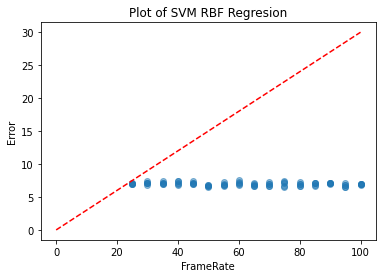

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
#np.random.seed(19680801)
listOFEverything22 = pickle.load(open("listOFEverything.pickle", 'rb'))
print(len(listOFEverything22))

frameRate = []
error = []
overlap = []

for sets in listOFEverything:
  error.append(sets[3][1])
  frameRate.append((sets[0] * 1000))
  overlap.append((sets[1]*1000))

N = 280
x = frameRate
y = error

plt.scatter(x, y, alpha=0.5)
x = [0,100]
y = [0,30]
plt.xlabel('FrameRate') 
plt.ylabel('Error')
plt.title('Plot of SVM RBF Regresion')
plt.plot(x, y, color='red',linestyle='dashed')
plt.show()

80


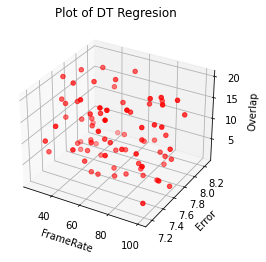

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

listOFEverything22 = pickle.load(open("listOFEverything.pickle", 'rb'))
print(len(listOFEverything22))

frameRate = []
error = []
overlap = []

for sets in listOFEverything:
  error.append(sets[3][2])
  frameRate.append((sets[0] * 1000))
  overlap.append((sets[1] * 1000))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = frameRate
y = error
z = overlap


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('FrameRate')
ax.set_ylabel('Error')
ax.set_zlabel('Overlap')
plt.title('Plot of DT Regresion')
plt.show()

In [ ]:
from pyAudioAnalysis import audioTrainTest as aT
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'

aT.feature_extraction_train_regression(baseDir, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "randomforest", "randomforestRegress", False)

In [ ]:
from pyAudioAnalysis import audioTrainTest as aT
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'


aT.feature_extraction_train_regression(baseDir, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmRegression", False)


In [ ]:
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'

len(os.listdir(baseDir)) cx

In [ ]:
type(os.listdir(baseDir))

In [ ]:
import shutil

shutil.copy('./ADReSS data/ADReSS-IS2020-data/train/cc_meta_data.txt' , './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/mmse scores/cc_meta_data.csv')
shutil.copy('./ADReSS data/ADReSS-IS2020-data/train/cd_meta_data.txt' , './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/mmse scores/cd_meta_data.csv')

In [ ]:
from pyAudioAnalysis import audioTrainTest as aT
early = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/early'
moderate = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/moderate'
norm = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm'
severe = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/severe'

from pyAudioAnalysis import MidTermFeatures as aF
features, class_names, _ = aF.multiple_directory_feature_extraction([norm,early,moderate,severe], 1.0, 1.0,
                                                 aT.shortTermWindow, aT.shortTermStep,
                                                 compute_beat=False)

In [ ]:
feature_matrix, labels = aT.features_to_matrix(features)

In [ ]:
import pickle
featnLabel = [feature_matrix, labels]
pickle.dump( featnLabel, open( "all4FeauturenLabels.p", "wb" ) )

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.05, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100000)
logisticRegr.fit(x_train, y_train)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

In [ ]:
import shutil
f = open('./ADReSS data/ADReSS-IS2020-data/train/cc_meta_data.txt')
lines = f.readlines()
f.close()
f = open('./ADReSS data/ADReSS-IS2020-data/train/cd_meta_data.txt')
lines2 = f.readlines()
f.close()
fileCopyList = []
listOfWavs = os.listdir('./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/')



for line in lines:
  line = line.rstrip().strip().split(';')
  try:
    line[3] = int(line[3])
    line[0] = line[0].replace(" ", "")
  except:
    continue
  for wav in listOfWavs:
    if line[0] in wav:
      srcDir = './ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/{}'.format(str(wav))
      baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted' 
      if line[3] <= 9:
        try:
          fileCopyList.append([srcDir,'{}/severe/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED1: {}', wav)
      elif (line[3] <= 20) and (line[3] >= 10):
        try:
          fileCopyList.append([srcDir,'{}/moderate/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED2: {}', wav)
      elif (line[3] <= 25) and (line[3] >= 21):
        try:
          fileCopyList.append([srcDir,'{}/early/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED3: {}', wav)
      elif line[3] >= 26:
        try:
          fileCopyList.append([srcDir,'{}/norm/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED4: {}', wav) 

listOfWavs = os.listdir('./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cd/')
for line in lines2:
  line = line.rstrip().strip().split(';')
  try:
    line[3] = int(line[3])
    line[0] = line[0].replace(" ", "")
  except:
    continue
  for wav in listOfWavs:
    if line[0] in wav:
      srcDir = './ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cd/{}'.format(str(wav))
      baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted' 
      if line[3] <= 9:
        try:
          fileCopyList.append([srcDir,'{}/severe/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED1: {}', wav)
      elif (line[3] <= 20) and (line[3] >= 10):
        try:
          fileCopyList.append([srcDir,'{}/moderate/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED2: {}', wav)
      elif (line[3] <= 25) and (line[3] >= 21):
        try:
          fileCopyList.append([srcDir,'{}/early/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED3: {}', wav)
      elif line[3] >= 26:
        try:
          fileCopyList.append([srcDir,'{}/norm/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED4: {}', wav) 



print(fileCopyList)
